### This is a simple example of how to get the probabilistic landmarks.
Imagine that you want to create a probabilistic heatmap of the corners of a rectangle.
This rectangle is defined by the coordinates (row,column): 
{ (100,100), (100,400), (300,100), (300,400) }

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation, binary_erosion, disk
from skimage.filters import gaussian

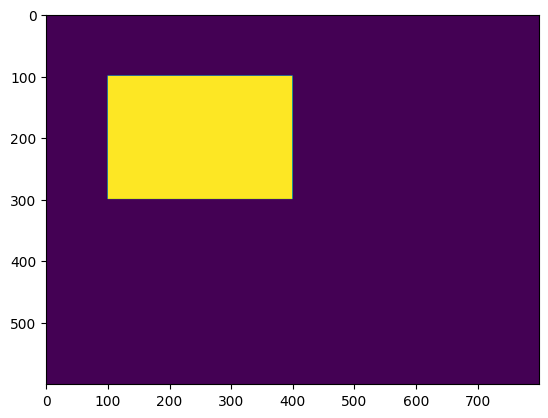

In [9]:
# Start by creating a mask of the rectangle
img_h = 600
img_w = 800
mask = np.zeros((img_h, img_w))
mask[100:300, 100:400] = 1

plt.figure()
plt.imshow(mask)
plt.show()
plt.close()

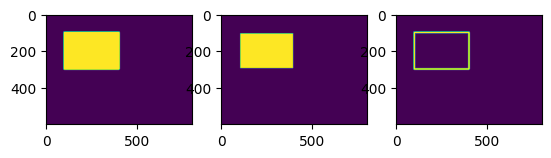

In [10]:
# Then extract the contour
# (Add 0 to transform from boolean to float)
disk_size = 5
dilated_image = binary_dilation(mask, disk(disk_size)) + 0.0
eroded_image = binary_erosion(mask, disk(disk_size)) + 0.0 

contour = dilated_image - eroded_image

plt.figure()

plt.subplot(1,3,1)
plt.imshow(dilated_image)

plt.subplot(1,3,2)
plt.imshow(eroded_image)

plt.subplot(1,3,3)
plt.imshow(contour)

plt.show()
plt.close()

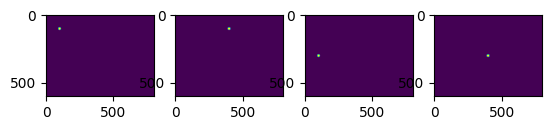

In [12]:
# Now, create a set of heatmaps that contains only a 1 at the coordinate
coords = [(100,100), (100,400), (300,100), (300,400)]
num_coords = len(coords)
heatmaps = np.zeros((num_coords, img_h, img_w))

for i in range(num_coords):
    current_coord = coords[i]
    heatmaps[i, current_coord[0], current_coord[1]] = 1

# Make the landmark bigger just for visualization purposes
plt.figure()
for i in range(num_coords):
    plt.subplot(1,num_coords, i+1)
    plt.imshow(binary_dilation(heatmaps[i], disk(10)))

plt.show()
plt.close()
    

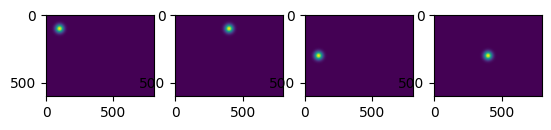

In [16]:
# Now, apply a gaussian filter to each heatmap
var = 20
gaussian_heatmaps = gaussian(heatmaps, [0, var, var])

plt.figure()
for i in range(num_coords):
    plt.subplot(1,num_coords, i+1)
    plt.imshow(gaussian_heatmaps[i])

plt.show()
plt.close()

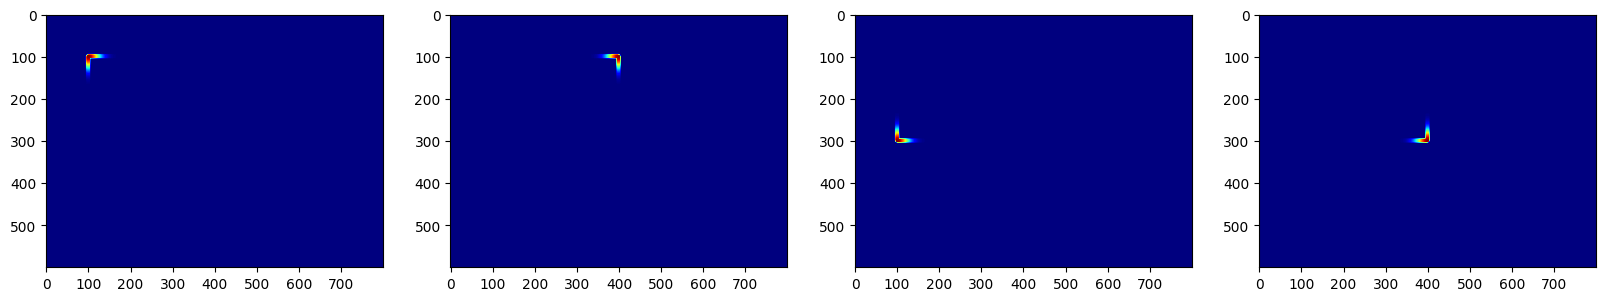

In [22]:
# Now, use the contour as a mask of the heatmaps
masked_heatmaps = np.zeros_like(gaussian_heatmaps)
for i in range(num_coords):
    masked_heatmaps[i] = contour * gaussian_heatmaps[i]
    
    # Renormalize so the values are between 0 and 1
    max_val = np.max(masked_heatmaps[i])
    masked_heatmaps[i] = masked_heatmaps[i] / max_val
    
plt.figure(figsize=(20,20))
for i in range(num_coords):
    plt.subplot(1,num_coords, i+1)
    plt.imshow(masked_heatmaps[i], cmap='jet')

plt.show()
plt.close()

That's it!